In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install Augmentor

## Import library

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img

import pathlib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import Augmentor
import PIL

## Import test and train datasets

In [4]:
test_path = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
train_path = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

## Check number of images in train and test set

In [6]:
# Train Image count
image_count_train = len(list(train_path.glob('*/**/*.jpg')))
print(f"Train Image count: {image_count_train}")

# Test Image count
image_count_test = len(list(test_path.glob('*/**/*.jpg')))
print(f"Test Image count: {image_count_test}")


Train Image count: 2239
Test Image count: 117


Found 2239 files belonging to 9 classes.


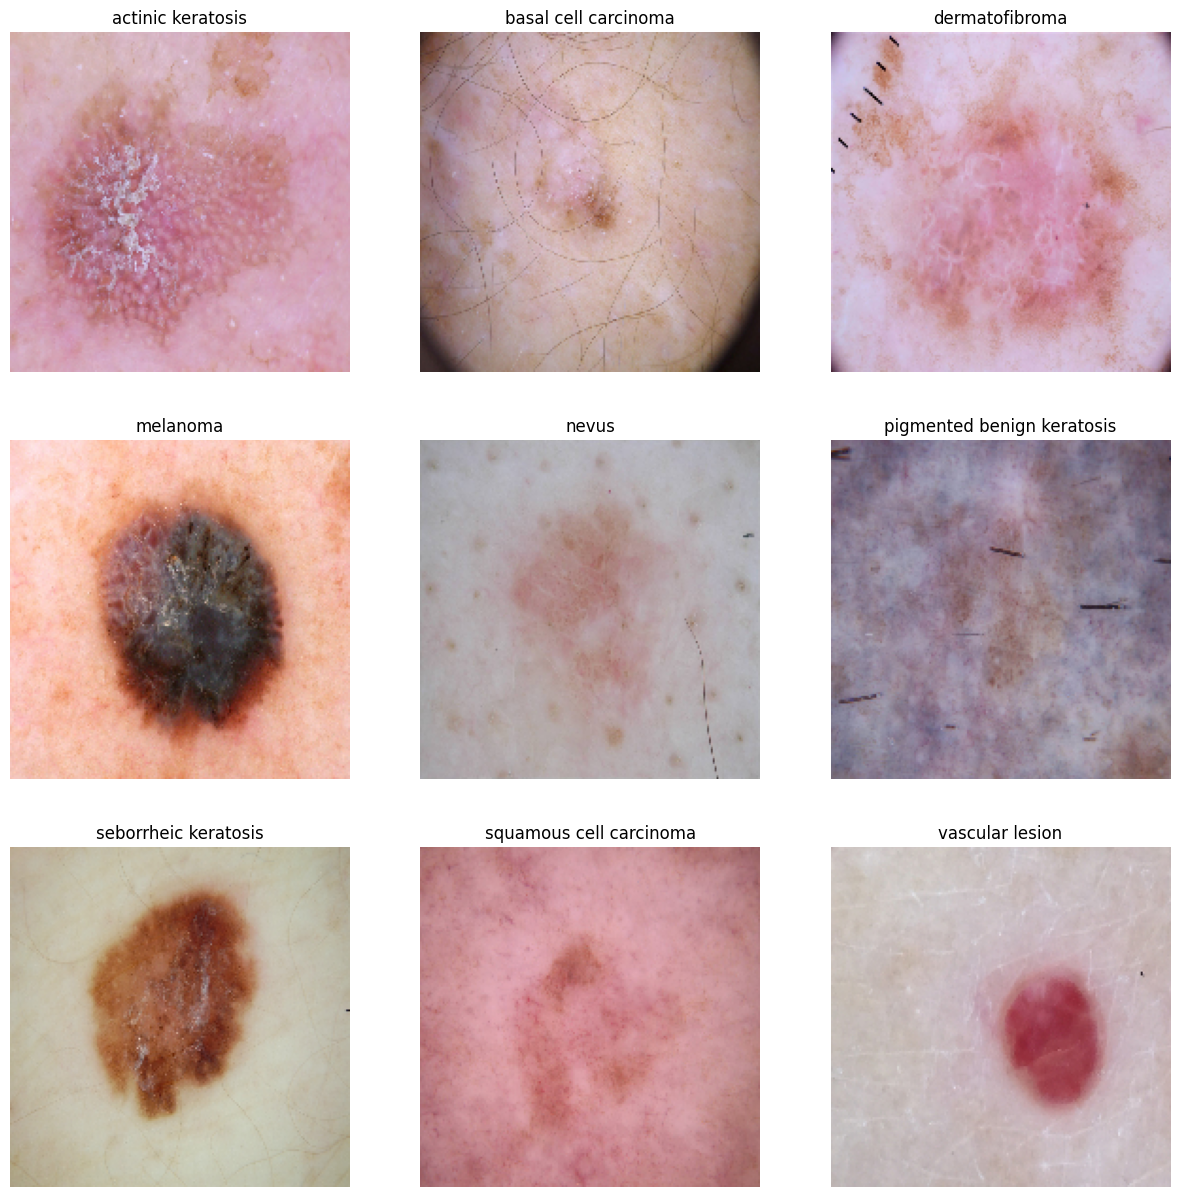

In [7]:
# Create an image dataset
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    batch_size=32,
    image_size=(180, 180),
    label_mode='categorical',
    seed=123
)

# Get class names
class_names = image_dataset.class_names

# Create a dictionary to store image paths for each class
files_path_dict = {c: [str(train_path) + '/' + c + '/' + x for x in os.listdir(str(train_path) + '/' + c)[:1]] for c in class_names}

# Visualize images
plt.figure(figsize=(15, 15))
for i, c in enumerate(class_names, start=1):
    plt.subplot(3, 3, i)
    path_list = files_path_dict[c]
    plt.imshow(load_img(path_list[0], target_size=(180, 180)))
    plt.title(c)
    plt.axis("off")

plt.show()


## Write a function to get the dataframe with class dataset distribution

In [8]:
def _distribution_count(path: pathlib.Path):
    # Count number of images in each class
    count = [len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
             for path in pathlib.Path(path).iterdir() if path.is_dir()]

    # Name of the classes
    sub_directory = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

    # Return a DataFrame with image count and class
    return pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', "Count"])

df = _distribution_count(train_path)

df

,Class,Count
0,dermatofibroma,95
1,actinic keratosis,114
2,basal cell carcinoma,376
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


### Plot to classify number of images per class

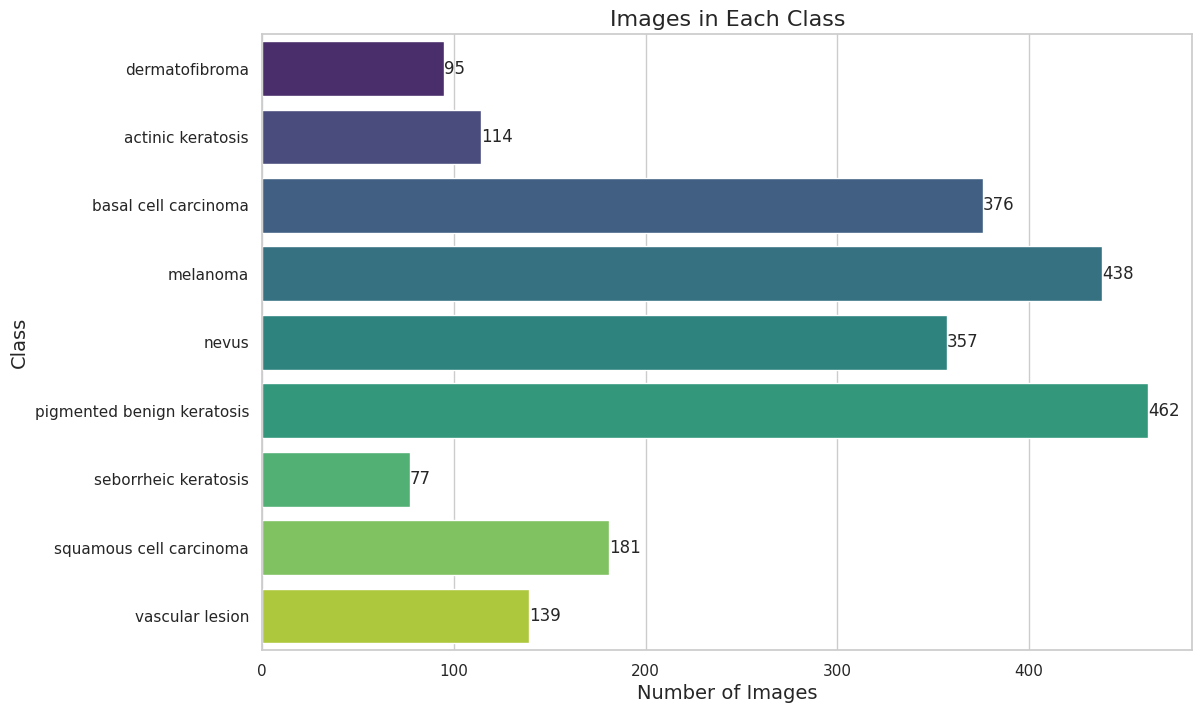

In [9]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Create a bar plot for the number of images in each class with color palette
plt.figure(figsize=(12, 8))
sns.barplot(x="Count", y="Class", data=df, palette="viridis")

# Set plot title and axis labels
plt.title("Images in Each Class", fontsize=16)
plt.xlabel("Number of Images", fontsize=14)
plt.ylabel("Class", fontsize=14)

# Add data labels to each bar
for index, value in enumerate(df["Count"]):
    plt.text(value, index, str(value), ha="left", va="center", fontsize=12)

# Show the plot
plt.show()

In [10]:
path_to_training_dataset= "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for name in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, name))
    p.rotate(probability=0.75, max_left_rotation=12, max_right_rotation=10)
    p.sample(600)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7CC8C483FBB0>: 100%|██████████| 600/600 [00:20<00:00, 28.70 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC8C484AF50>: 100%|██████████| 600/600 [00:22<00:00, 27.08 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC8C49D2110>: 100%|██████████| 600/600 [00:23<00:00, 25.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7CC8C49C33A0>: 100%|██████████| 600/600 [01:47<00:00,  5.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=796x682 at 0x7CC8C49A22C0>: 100%|██████████| 600/600 [01:44<00:00,  5.75 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC8C77C6800>: 100%|██████████| 600/600 [00:23<00:00, 25.03 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CC8C49F6350>: 100%|██████████| 600/600 [00:55<00:00, 10.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7CC8C4BDA4D0>: 100%|██████████| 600/600 [00:23<00:00, 25.93 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CC8C4988A00>: 100%|██████████| 600/600 [00:21<00:00, 27.32 Samples/s]


In [11]:
# Number of image generated by Augmentor.

print(len(list(train_path.glob('*/output/*.jpg'))))

5400


## Build model

In [17]:
# train dataset
training = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               batch_size=32,
                                                               image_size=(180,180),
                                                               label_mode='categorical',
                                                               seed=12,subset="training",
                                                               validation_split=0.2)

Found 7639 files belonging to 9 classes.
Using 6112 files for training.


## Validate model

In [13]:
# validate dataset
validation =tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                                batch_size=32,
                                                                image_size=(180,180),
                                                                label_mode='categorical',
                                                                seed=12,subset="validation",
                                                                validation_split=0.2)

Found 7639 files belonging to 9 classes.
Using 1527 files for validation.


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training = training.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

# Prepare the validation dataset
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential()

# Rescaling Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout layer with 50% Fraction of the input units to drop
model.add(layers.Dropout(0.5))

# Flatten Layer
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, activation='relu'))

# Dropout layer with 25% Fraction of the input units to drop
model.add(layers.Dropout(0.25))

# Dense Layer with softmax activation function
model.add(layers.Dense(len(class_names), activation='softmax'))

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

## Plot model Images

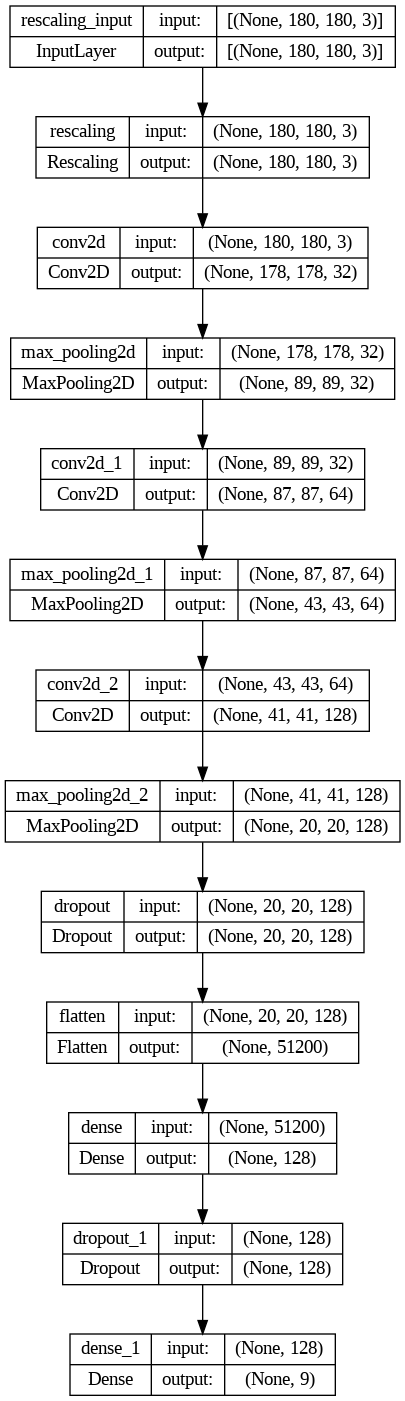

In [16]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Complile and save the model

In [34]:
from tensorflow.keras.metrics import Precision, Recall, F1Score

model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=[Precision(), Recall(), F1Score(average="weighted"), "accuracy"])

# Define ModelCheckpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint("model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",
                             verbose=1)

earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=15,
                          mode="auto",
                          verbose=1)

## Fit the model

In [35]:
history = model.fit(training,
                    validation_data=validation,
                    epochs= 30,
                    callbacks=[checkpoint, earlystop])

Epoch 1/30
190/191 [============================>.] - ETA: 0s - loss: 0.1639 - precision_4: 0.9395 - recall_4: 0.9326 - f1_score: 0.9355 - accuracy: 0.9354
Epoch 1: val_accuracy improved from -inf to 0.84741, saving model to model.h5
191/191 [==============================] - 41s 201ms/step - loss: 0.1634 - precision_4: 0.9398 - recall_4: 0.9329 - f1_score: 0.9358 - accuracy: 0.9357 - val_loss: 0.8913 - val_precision_4: 0.8511 - val_recall_4: 0.8461 - val_f1_score: 0.8474 - val_accuracy: 0.8474
Epoch 2/30
191/191 [==============================] - ETA: 0s - loss: 0.1874 - precision_4: 0.9343 - recall_4: 0.9244 - f1_score: 0.9296 - accuracy: 0.9295
Epoch 2: val_accuracy did not improve from 0.84741
191/191 [==============================] - 33s 168ms/step - loss: 0.1874 - precision_4: 0.9343 - recall_4: 0.9244 - f1_score: 0.9296 - accuracy: 0.9295 - val_loss: 0.7880 - val_precision_4: 0.8408 - val_recall_4: 0.8304 - val_f1_score: 0.8349 - val_accuracy: 0.8356
Epoch 3/30
191/191 [=======

## Training plots

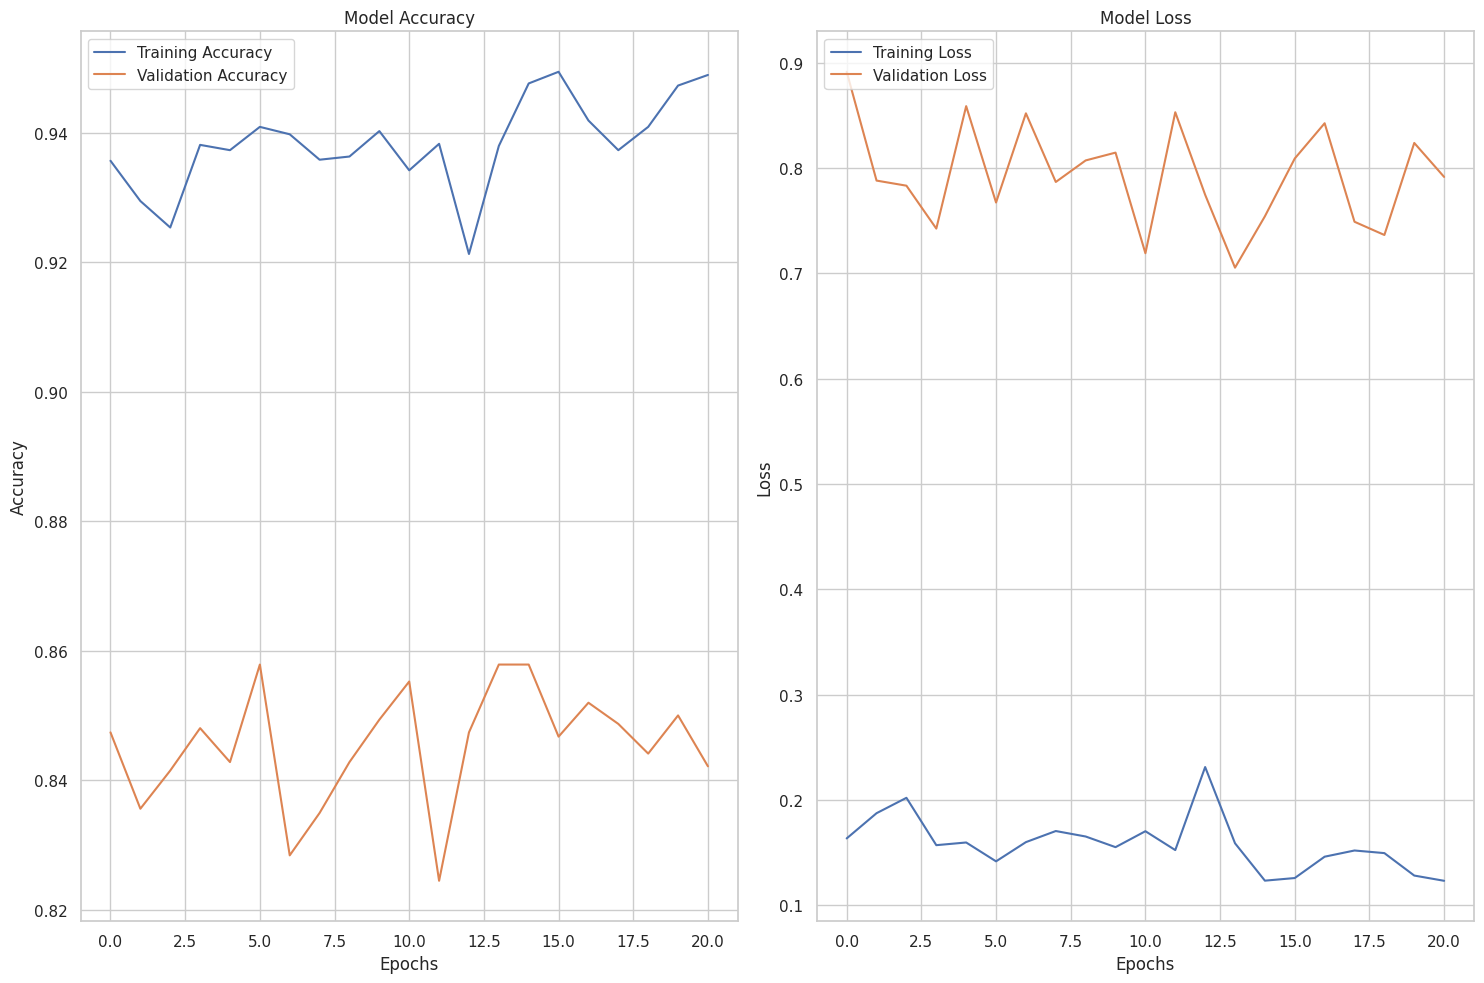

In [36]:
epochs_range = range(earlystop.stopped_epoch + 1)

# Set up the figure
plt.figure(figsize=(15, 10))

# Plot Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()

## Prediction

1/1 [==============================] - 0s 54ms/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


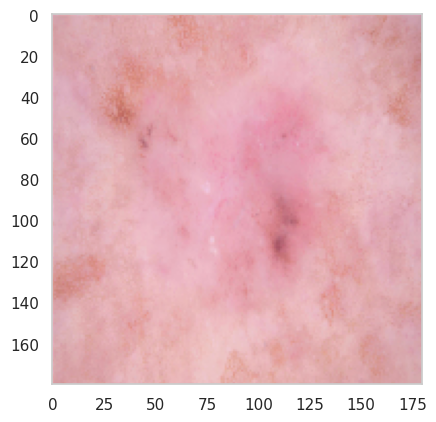

In [39]:
# Get the path for test images of a specific class
test_class_path = os.path.join(test_path, class_names[1], '*')
test_images = glob.glob(test_class_path)

# Load the latest test image
test_image = load_img(test_images[-1], target_size=(180, 180, 3))

# Display the test image
plt.imshow(test_image)
plt.grid(False)

# Preprocess the image for prediction
img = np.expand_dims(test_image, axis=0)

# Make a prediction using the model
pred = model.predict(img)
pred_class_index = np.argmax(pred)
pred_class = class_names[pred_class_index]

# Print the actual and predicted class
print(f"Actual Class: {class_names[1]}\nPredicted Class: {pred_class}")

## Findings
  -  As there are more imbalance in the data, so we have use many metricts. The final model has 0.85789